In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from plotnine import ggplot, aes, geom_point, labs
from scipy.stats import linregress


# Multicollinearity Demo

In [3]:

### multicollinearity

# Uncorrelated predictor variables
X1 = [4, 4, 4, 4, 6, 6, 6, 6]
X2 = [2, 2, 3, 3, 2, 2, 3, 3]
Y = [42, 39, 48, 51, 49, 53, 61, 60]


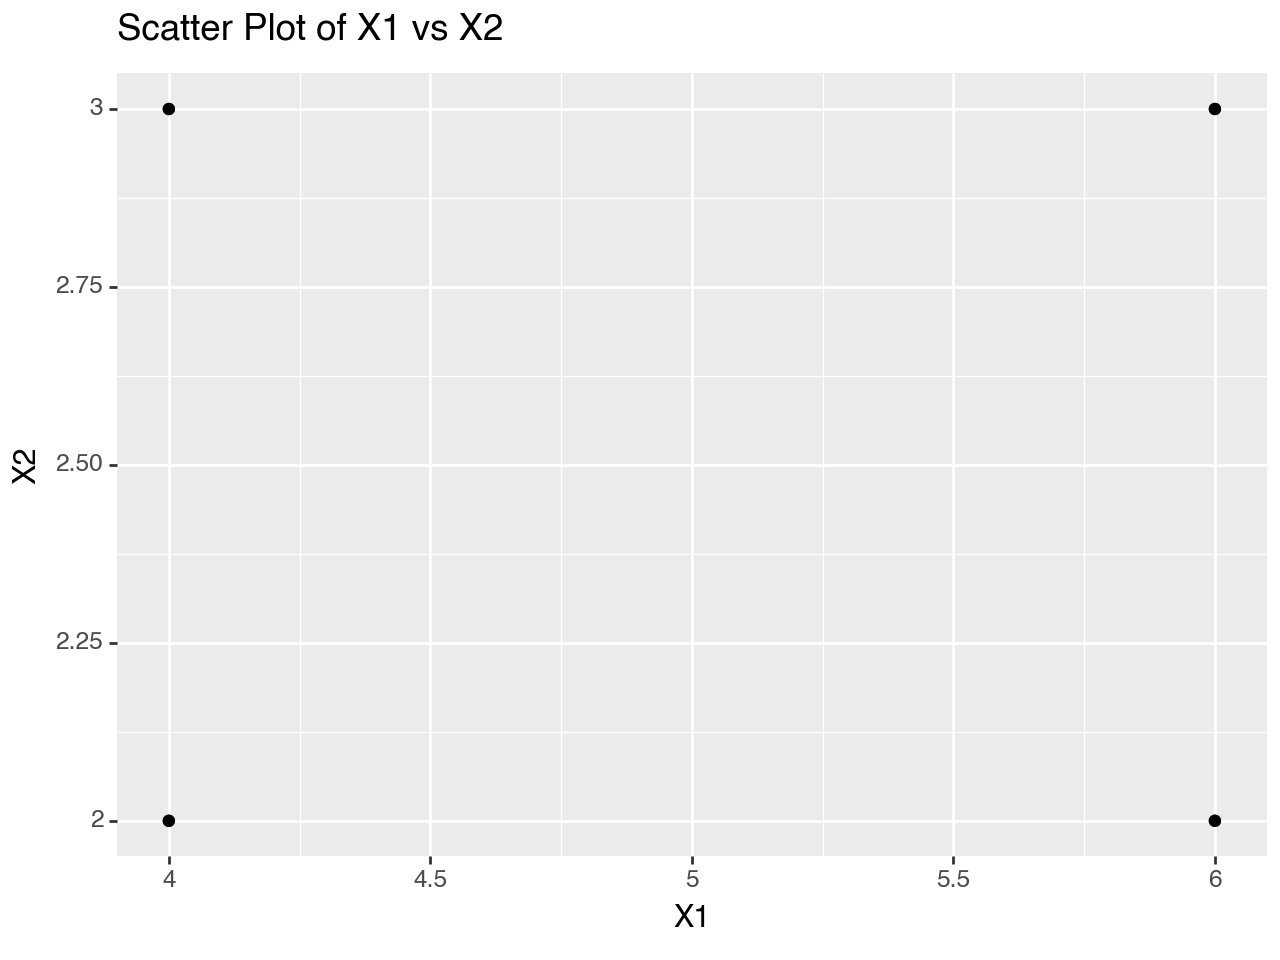

<Figure Size: (640 x 480)>

In [4]:

# Creating DataFrame 
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Plot X1 vs X2
plot = (ggplot(df, aes(x='X1', y='X2')) +
        geom_point() +
        labs(x='X1', y='X2', title='Scatter Plot of X1 vs X2'))
plot

In [5]:

# Correlation between X1 and X2
correlation = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation}')

Correlation between X1 and X2: 0.0


In [6]:

# Linear model Y ~ X1 + X2
model1 = ols('Y ~ X1 + X2', data=df).fit()
model1.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     57.06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           0.000361
Time:                        22:02:41   Log-Likelihood:                -14.511
No. Observations:                   8   AIC:                             35.02
Df Residuals:                       5   BIC:                             35.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3750      4.740      0.079      0.940     -11.811      12.561
X1             5.3750      0.664      8.097      0.000       3.669       7.081
X2             9.2500      1.328      6.968      0.001       5.837      12.663
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   2.773
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                0.878
Skew:                          -0.108   Prob(JB):                        0.645
Kurtosis:                       1.391   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Linear model Y ~ X1
model_X1 = ols('Y ~ X1', data=df).fit()
model_X1.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     7.347
Date:                Wed, 25 Sep 2024   Prob (F-statistic):             0.0351
Time:                        22:02:41   Log-Likelihood:                -23.995
No. Observations:                   8   AIC:                             51.99
Df Residuals:                       6   BIC:                             52.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5000     10.111      2.324      0.059      -1.242      48.242
X1             5.3750      1.983      2.711      0.035       0.523      10.227
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                0.935
Skew:                          -0.117   Prob(JB):                        0.626
Kurtosis:                       1.341   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Linear model Y ~ X2
model_X2 = ols('Y ~ X2', data=df).fit()
model_X2.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     4.128
Date:                Wed, 25 Sep 2024   Prob (F-statistic):             0.0885
Time:                        22:02:41   Log-Likelihood:                -25.100
No. Observations:                   8   AIC:                             54.20
Df Residuals:                       6   BIC:                             54.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2500     11.608      2.348      0.057      -1.153      55.653
X2             9.2500      4.553      2.032      0.088      -1.891      20.391
==============================================================================
Omnibus:                        4.296   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                1.012
Skew:                          -0.008   Prob(JB):                        0.603
Kurtosis:                       1.257   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# ANOVA for both models
from statsmodels.stats.anova import anova_lm

anova_results1 = anova_lm(model1)
anova_results1

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,231.125,231.125,65.567376,0.000466
X2,1.0,171.125,171.125,48.546099,0.000937
Residual,5.0,17.625,3.525,NaN,NaN


In [10]:
anova_results_X1 = anova_lm(model_X1)
anova_results_X1

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,231.125,231.125000,7.34702,0.035081
Residual,6.0,188.750,31.458333,NaN,NaN


In [11]:
anova_results_X2 = anova_lm(model_X2)
anova_results_X2

,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,171.125,171.125000,4.127638,0.08846
Residual,6.0,248.750,41.458333,NaN,NaN


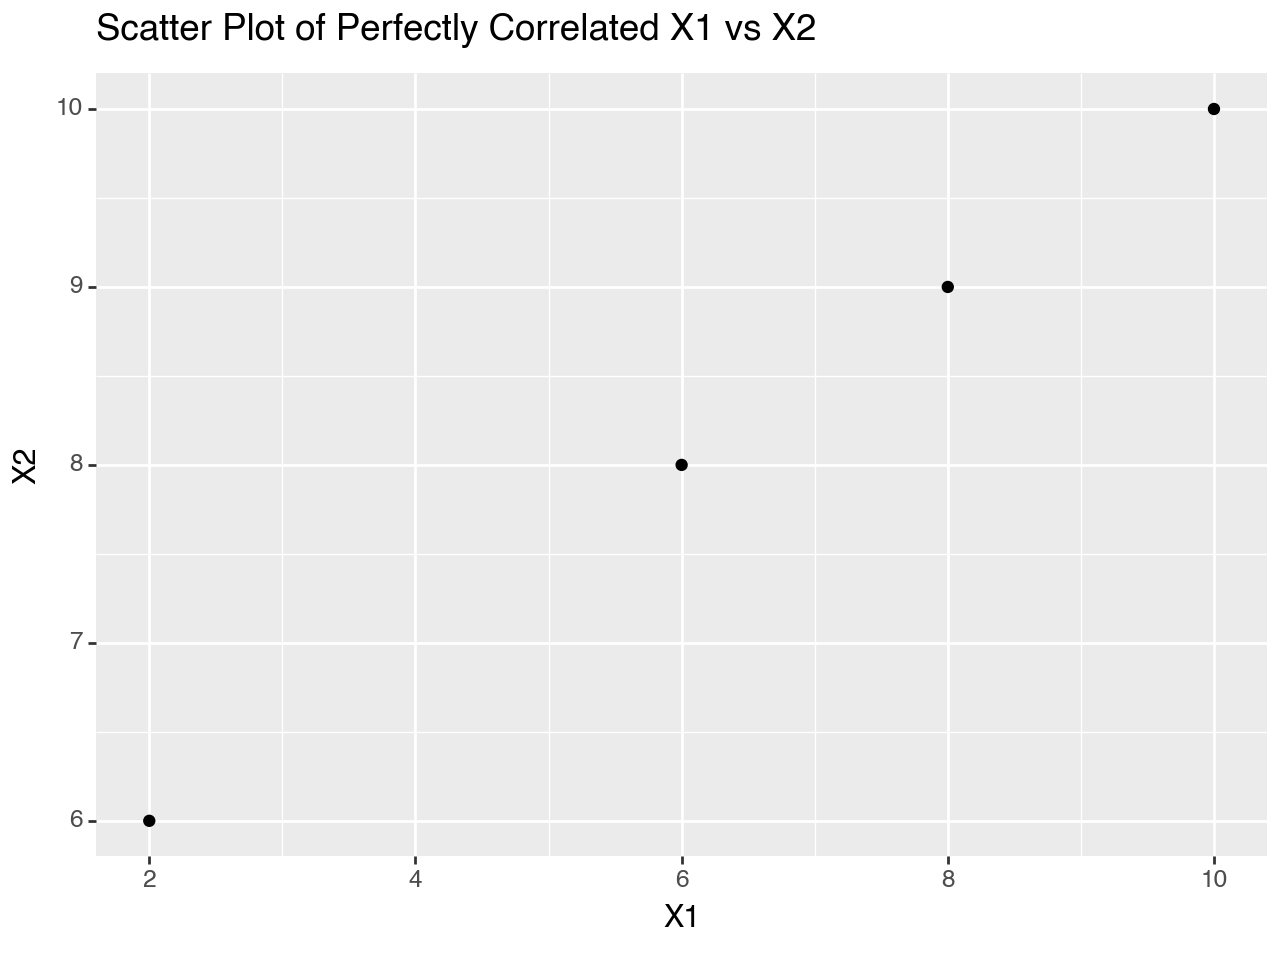

<Figure Size: (640 x 480)>

In [12]:
# Perfectly correlated case
X1 = [2, 8, 6, 10]
X2 = [6, 9, 8, 10]
Y = [23, 83, 63, 103]

df_perfect = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Plot X1 vs X2
plot_perfect = (ggplot(df_perfect, aes(x='X1', y='X2')) +
                geom_point() +
                labs(x='X1', y='X2', title='Scatter Plot of Perfectly Correlated X1 vs X2'))
plot_perfect

In [13]:
# Correlation between X1 and X2
correlation_perfect = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation_perfect}')

Correlation between X1 and X2: 1.0


In [14]:
X = np.column_stack([np.ones(len(X1)), X1, X2])
X

array([[ 1.,  2.,  6.],
       [ 1.,  8.,  9.],
       [ 1.,  6.,  8.],
       [ 1., 10., 10.]])

In [15]:
# Matrix operations

XtX = np.dot(X.T, X)
print(f'XtX Matrix:\n{XtX}')

XtX Matrix:
[[  4.  26.  33.]
 [ 26. 204. 232.]
 [ 33. 232. 281.]]


In [16]:
# Eigenvalues
eigenvalues = np.linalg.eigvals(XtX)
print(f'Eigenvalues:\n{eigenvalues}') #2nd eigen val very close to zero !!!! 
#numerically near singular
#this is going to be an issue for us:

Eigenvalues:
[4.81365468e+02 7.42814262e-17 7.63453185e+00]


In [17]:
import scipy.linalg as spla

# Attempt to invert the matrix
XtX_inv = spla.solve(XtX, np.eye(3))
print(f'Inverse of XtX:\n{XtX_inv}')

#it blows up and gives you a warning on the "Condition Number" of the matrix 

Inverse of XtX:
[[-4.56937087e+15 -4.56937087e+14  9.13874175e+14]
 [-4.56937087e+14 -4.56937087e+13  9.13874175e+13]
 [ 9.13874175e+14  9.13874175e+13 -1.82774835e+14]]


/var/folders/xp/wk0n_cc925g6bz7szq91rxhxpvk82n/T/ipykernel_87955/3933071815.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=3.08324e-19): result may not be accurate.


In [18]:
#the warning is basically telling you the result is nonsense. Sanity check! 

In [19]:
XtX_inv @ XtX # this is not the identity.... cry

array([[ 2.75   , -2.     , 16.75   ],
       [ 0.21875,  6.75   ,  4.46875],
       [-0.25   , -2.     , -4.25   ]])

In [20]:
#If you use np.linalg.inv ... it doesn't do the float calcs exactly and will actually let you invert a singular matrix... watch out! 
np.linalg.inv(XtX)

# Interesting discussion of the issue: https://github.com/numpy/numpy/issues/2074

array([[-4.56937087e+15, -4.56937087e+14,  9.13874175e+14],
       [-4.56937087e+14, -4.56937087e+13,  9.13874175e+13],
       [ 9.13874175e+14,  9.13874175e+13, -1.82774835e+14]])

## Variance Inflation Factors - VIFs

In [22]:
# Variance Inflation - generating new data
np.random.seed(0)
X1 = np.random.uniform(25, 50, 100)
X2 = np.random.normal(10, 3, 100)
eps = np.random.normal(0, 4, 100)

df_vif = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': 7 + 3 * X1 + 5 * X2 + eps
})

# Correlation between X1 and X2
correlation_X1_X2 = np.corrcoef(X1, X2)[0, 1]
print(f'Correlation between X1 and X2: {correlation_X1_X2}')

Correlation between X1 and X2: -0.01824782721587361


In [23]:
# Linear model with X1 and X2
mod1 = ols('Y ~ X1 + X2', data=df_vif).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2193.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.82e-81
Time:                        22:02:42   Log-Likelihood:                -277.67
No. Observations:                 100   AIC:                             561.3
Df Residuals:                      97   BIC:                             569.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9068      2.505      2.358      0.020       0.934      10.880
X1             2.9676      0.055     54.178      0.000       2.859       3.076
X2             5.1591      0.132     39.062      0.000       4.897       5.421
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif_model_X1o = ols('X1 ~ X2', data=df_vif).fit()
r2j_X1o = vif_model_X1o.rsquared
vif_j_x1 = 1/(1-r2j_X1o)
print(f'VIF for X1: {vif_j_x1}')

VIF for X1: 1.000333094112843


### VIF Close to 1 indicates not very much multicollinearity between X1 and other predictors.

### On the other hand...

In [27]:

# Creating a nearly perfectly collinear variable X3
df_vif['X3'] = 2 * df_vif['X1'] + 3 * df_vif['X2'] + np.random.normal(0, 0.01, 100)

correlation_X1_X3 = np.corrcoef(df_vif['X1'], df_vif['X3'])[0, 1]
correlation_X2_X3 = np.corrcoef(df_vif['X2'], df_vif['X3'])[0, 1]
correlation_comb = np.corrcoef(2 * df_vif['X1'] + 3 * df_vif['X2'], df_vif['X3'])[0, 1]

print(f'Correlation between X1 and X3: {correlation_X1_X3}')
print(f'Correlation between X2 and X3: {correlation_X2_X3}')
print(f'Correlation between (2*X1 + 3*X2) and X3: {correlation_comb}')

Correlation between X1 and X3: 0.8464409676819135
Correlation between X2 and X3: 0.5169479332790725
Correlation between (2*X1 + 3*X2) and X3: 0.9999998570072173


In [28]:
# Linear model with X1, X2, and X3
mod2 = ols('Y ~ X1 + X2 + X3', data=df_vif).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1469.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.67e-80
Time:                        22:02:42   Log-Likelihood:                -276.92
No. Observations:                 100   AIC:                             561.8
Df Residuals:                      96   BIC:                             572.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8079      2.501      2.322      0.022       0.844      10.772
X1          -102.9961     87.588     -1.176      0.243    -276.858      70.866
X2          -153.7766    131.375     -1.171      0.245    -414.553     107.000
X3            52.9822     43.795      1.210      0.229     -33.949     139.914
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.044
Skew:                           0.020   Prob(JB):                        0.978
Kurtosis:                       3.094   Cond. No.                     4.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# VIF calculation for X1
vif_model_X1 = ols('X1 ~ X2 + X3', data=df_vif).fit()
r2j_X1 = vif_model_X1.rsquared
vif_j_X1 = 1 / (1 - r2j_X1)
print(f'VIF for X1: {vif_j_X1}')

VIF for X1: 2570128.137094504


In [30]:
# VIF calculation for X3
vif_model_X2 = ols('X2 ~ X1 + X3', data=df_vif).fit()
r2j_X2 = vif_model_X2.rsquared
vif_j_X2 = 1 / (1 - r2j_X2)
print(f'VIF for X2: {vif_j_X2}')

VIF for X2: 994491.2150962795


In [31]:
# VIF calculation for X3
vif_model_X3 = ols('X3 ~ X1 + X2', data=df_vif).fit()
r2j_X3 = vif_model_X3.rsquared
vif_j_X3 = 1 / (1 - r2j_X3)
print(f'VIF for X3: {vif_j_X3}')

VIF for X3: 3506271.326686703


### VIFs>>>10 indicate severe multicollinearity among predictors.

## Exercise

For the dataset "multicollinearity.txt", perform the following:

1. Check the pairwise correlations of the predictors.
2. Compare the coefficient for each predictor in two cases: a. when regressing Y on that predictor only, and b. when regressing Y on all predictors. Do you see a major change in the coefficients? Their standard errors? What does this tell you about the presence of multicollinearity?
3. Calculate the VIFs for each predictor. Which VIFs are concerning? Comment on what you find.
4. Consider regressing `X4` onto the other predictors `X1` through `X3`. Save the residuals from this model and call them `res4`. Then regress Y onto `res4` and look at the coefficient. Compare this coefficient to the coefficients for `X4` you found in part 2. What do you notice?
5. Explain geometrically what we are doing in #4. Are we surprised by the results? 

In [34]:
data = pd.read_csv("~/Desktop/repos/regression_f24/data/multicollinearity.txt", sep="\t")

In [35]:
data.head()

,y,x1,x2,x3,x4
0,1.860,0.374,0.846,1.951,1.325
1,9.747,2.184,3.754,5.099,5.372
2,12.707,2.164,3.635,2.505,2.582
3,12.822,5.595,4.805,3.653,3.399
4,5.160,5.330,2.611,1.873,1.474


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    float64
 3   x3      200 non-null    float64
 4   x4      200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [37]:
data.iloc[:, 1:].corr()

,x1,x2,x3,x4
x1,1.000000,0.999811,0.999495,0.998843
x2,0.999811,1.000000,0.999671,0.999013
x3,0.999495,0.999671,1.000000,0.999306
x4,0.998843,0.999013,0.999306,1.000000


The coefficient for X1 goes from being pistive at 2.25 to being negative at -0.1675 when regressed alongside all predictors. The std error grow by a factor of ~ 50x when other correlated predictors are added to the regression alongside x1.

In [39]:
mod_y_x1 = ols("y ~ x1", data=data).fit()
mod_y_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.396e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.39e-284
Time:                        22:02:42   Log-Likelihood:                -589.73
No. Observations:                 200   AIC:                             1183.
Df Residuals:                     198   BIC:                             1190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7257      0.659      2.617      0.010       0.426       3.026
x1             2.1250      0.006    373.575      0.000       2.114       2.136
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.451
Skew:                          -0.106   Prob(JB):                        0.798
Kurtosis:                       3.095   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
mod_y_all = ols("y ~ x1 + x2 + x3 + x4", data=data).fit()
mod_y_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.200e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.92e-308
Time:                        22:02:42   Log-Likelihood:                -515.82
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     195   BIC:                             1058.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0374      0.462      2.248      0.026       0.127       1.948
x1            -0.1675      0.204     -0.821      0.413      -0.570       0.235
x2             1.1364      0.281      4.050      0.000       0.583       1.690
x3             0.9788      0.256      3.830      0.000       0.475       1.483
x4             1.1175      0.210      5.311      0.000       0.703       1.533
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.219
Skew:                          -0.046   Prob(JB):                        0.896
Kurtosis:                       3.133   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for X2  changes but stays positive. The standard error increases by a factor of 60 times (!). This is variance inflation!

In [42]:
mod_y_x2 = ols("y ~ x2", data=data).fit()
mod_y_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.980e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.20e-299
Time:                        22:02:42   Log-Likelihood:                -554.80
No. Observations:                 200   AIC:                             1114.
Df Residuals:                     198   BIC:                             1120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3706      0.554      2.473      0.014       0.278       2.464
x2             2.3613      0.005    444.944      0.000       2.351       2.372
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.043
Skew:                           0.030   Prob(JB):                        0.979
Kurtosis:                       2.960   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient changes, but sign stays the same. The SE grows by a factor of 50x...!

In [44]:
mod_y_x3 = ols("y ~ x3", data=data).fit()
mod_y_x3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.218e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.86e-304
Time:                        22:02:42   Log-Likelihood:                -543.45
No. Observations:                 200   AIC:                             1091.
Df Residuals:                     198   BIC:                             1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0831      0.524      2.066      0.040       0.049       2.117
x3             2.9492      0.006    470.945      0.000       2.937       2.962
==============================================================================
Omnibus:                        0.792   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.741
Skew:                          -0.148   Prob(JB):                        0.690
Kurtosis:                       2.965   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
m_y_x4 = ols("y ~ x4", data=data).fit()
m_y_x4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.307e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.46e-281
Time:                        22:02:42   Log-Likelihood:                -596.26
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     198   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8964      0.683      1.312      0.191      -0.451       2.244
x4             4.2002      0.012    361.558      0.000       4.177       4.223
==============================================================================
Omnibus:                        0.500   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.641
Skew:                           0.079   Prob(JB):                        0.726
Kurtosis:                       2.772   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

The VIF values for all the predictors are very high, pointing to severe multicollinearity in the model, confirming the conclusion of the previous question

In [48]:
def calculate_VIF(r2_j):
    return (1/(1-r2_j))

In [49]:
mdl_x1 = ols("x1~x2+x3+x4", data=data).fit()
r2j_x1 = mdl_x1.rsquared
print(r2j_x1)
print(calculate_VIF(r2j_x1))

0.9996231915946605
2653.8686128804293


In [50]:
mdl_x2 = ols("x2~x1+x3+x4", data=data).fit()
r2j_x2 = mdl_x2.rsquared
print(r2j_x2)
print(calculate_VIF(r2j_x2))

0.9997540700184278
4066.1980032159418


In [51]:
mdl_x3 = ols("x3~x2+x1+x4", data=data).fit()
r2j_x3 = mdl_x3.rsquared
print(r2j_x3)
print(calculate_VIF(r2j_x3))

0.9995375633481587
2162.4583519023327


In [52]:
mdl_x4 = ols("x4~x2+x3+x1", data=data).fit()
r2j_x4 = mdl_x4.rsquared
print(r2j_x4)
print(calculate_VIF(r2j_x4))

0.9986155124710678
722.2889185367274


## 4.

#### The coefficient for res4 is the same as that of X4 in the model with all the predictors and of res4 in the model with all the other predictors. (Key observation: $res4 \perp span\{X_1,X_2,X_3\}$.)

In [54]:
modres = ols("x4~x1+x2+x3", data=data).fit()
res4 = modres.resid

In [55]:
data['res4'] = res4

In [56]:
mod_y_res4 = ols("y~res4", data=data).fit()
mod_y_res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01938
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.889
Time:                        22:02:42   Log-Likelihood:                -1245.7
No. Observations:                 200   AIC:                             2495.
Df Residuals:                     198   BIC:                             2502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    215.3599      8.716     24.707      0.000     198.171     232.549
res4           1.1175      8.028      0.139      0.889     -14.714      16.949
==============================================================================
Omnibus:                       91.438   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.967
Skew:                          -0.004   Prob(JB):                      0.00252
Kurtosis:                       1.802   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
mod_y_x123res4 = ols("y~x1+x2+x3+res4", data=data).fit()
mod_y_x123res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.200e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.92e-308
Time:                        22:02:42   Log-Likelihood:                -515.82
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     195   BIC:                             1058.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1484      0.461      2.491      0.014       0.239       2.058
x1            -0.1589      0.204     -0.779      0.437      -0.561       0.244
x2             1.1616      0.281      4.140      0.000       0.608       1.715
x3             1.7193      0.214      8.027      0.000       1.297       2.142
res4           1.1175      0.210      5.311      0.000       0.703       1.533
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.219
Skew:                          -0.046   Prob(JB):                        0.896
Kurtosis:                       3.133   Cond. No.                         358.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
mod_y_all = ols("y ~ x1 + x2 + x3 + x4", data=data).fit()
mod_y_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.200e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.92e-308
Time:                        22:02:42   Log-Likelihood:                -515.82
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     195   BIC:                             1058.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0374      0.462      2.248      0.026       0.127       1.948
x1            -0.1675      0.204     -0.821      0.413      -0.570       0.235
x2             1.1364      0.281      4.050      0.000       0.583       1.690
x3             0.9788      0.256      3.830      0.000       0.475       1.483
x4             1.1175      0.210      5.311      0.000       0.703       1.533
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.219
Skew:                          -0.046   Prob(JB):                        0.896
Kurtosis:                       3.133   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### But note the coefficient is different from that in the model with just y onto x4:

In [60]:
m_y_x4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.307e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.46e-281
Time:                        22:02:42   Log-Likelihood:                -596.26
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     198   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8964      0.683      1.312      0.191      -0.451       2.244
x4             4.2002      0.012    361.558      0.000       4.177       4.223
==============================================================================
Omnibus:                        0.500   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.641
Skew:                           0.079   Prob(JB):                        0.726
Kurtosis:                       2.772   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. 

#### Geometric Interpretation of the Models
Model 1: 

$y∼X_1 + X_2 + X_3 + res4$:

Here, 
$res4$ is the vector that represents the part of 

$X_4$ that is orthogonal to 
$span\{X_1, X_2, X_3\}$. Since it is orthogonal to 
$span\{X_1, X_2, X_3\}$, it adds information to the model that 
$span\{X_1, X_2, X_3\}$ cannot explain.
Geometrically, you are using four vectors: 
$X_1$, $X_2$, $X_3$, and 
$res4$, form a 4-dimensional basis. 



Model 2: 

$y∼X_1+X_2+X_3+X_4$:

In this model, you are using 
$X_4$ directly. However, when you regress 
$y$ onto all predictors $X_1,~X_2,~X_3~,X_4$, any part of 

$X_4$ that is explained by 
$X_1$, $X_2$, or $X_3$ (the projection of $X_2$ onto $span\{X_1, X_2, X_3\}$) does not add new information.
The model is effectively using the  part of 
$X_4$ which is orthogonal to $span\{X_1, X_2, X_3\}$ (i.e., the same 
$res4$ from the first model) to explain 
$y$, in addition to 
$X_1$, $X_2$, and $X_3$.

#### Why the coefficients are the same:

In both models, the last predictor variable (whether it's 
$res4$ in Model 1 or 
$X_4$ in Model 2) represents the same direction in the vector space: the part  
of $X_4$ that is orthogonal to 
$span\{X_1, X_2, X_3\}$

In 
$y∼X_1 + X_2 + X_3 + res4$, you're explicitly using the orthogonal part of 
$X_4$ (i.e.,  $res4$).
In 
$y∼X_1+X_2+X_3+X_4$, although you include all of 
$X_4$, the model implicitly separates the part of 
$X_4$ that is redundant (explained by 
$\{X_1, X_2, X_3\}$) and only uses the part of 
$X_4$ orthogonal to $span\{X_1, X_2, X_3\}$, just like in the first model.